In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python

In [16]:
data = pd.read_csv('sales_timeseries.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True, drop=True, append=False)
data.index.name = None
data

,TotalSales
2022-01-01,934.137692
2022-01-02,674.789014
2022-01-03,1105.534033
2022-01-04,1113.770660
2022-01-05,858.990135
...,...
2022-12-27,1420.403449
2022-12-28,876.885462
2022-12-29,1158.683086
2022-12-30,1073.844337


<Axes: title={'center': 'Daily Total Sales'}>

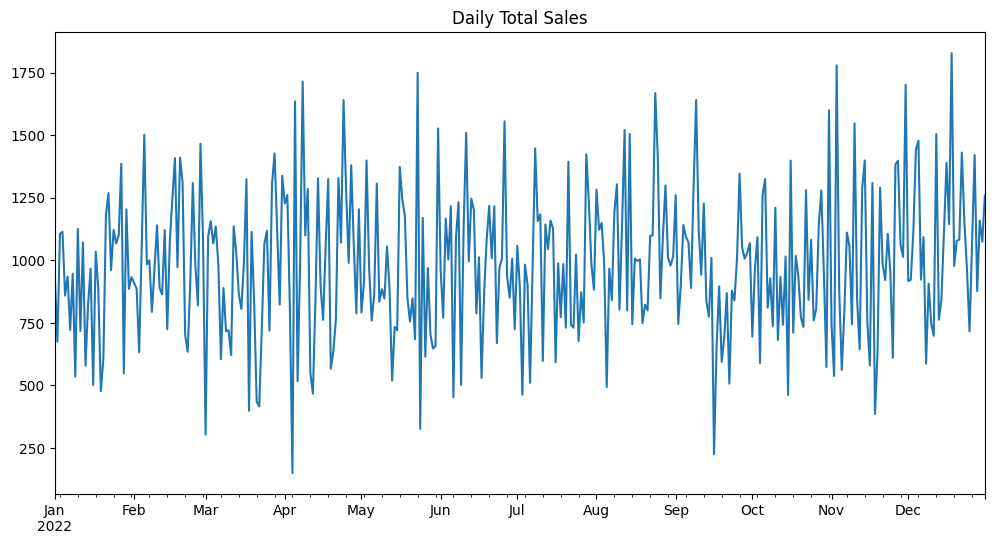

In [17]:
# Time Series Visualization
data['TotalSales'].plot(title='Daily Total Sales', figsize=(12, 6))

,TotalSales,MA_7
2022-01-01,934.137692,NaN
2022-01-02,674.789014,NaN
2022-01-03,1105.534033,NaN
2022-01-04,1113.770660,NaN
2022-01-05,858.990135,NaN
...,...,...
2022-12-27,1420.403449,1119.998243
2022-12-28,876.885462,1090.598994
2022-12-29,1158.683086,1051.765890
2022-12-30,1073.844337,1040.576269


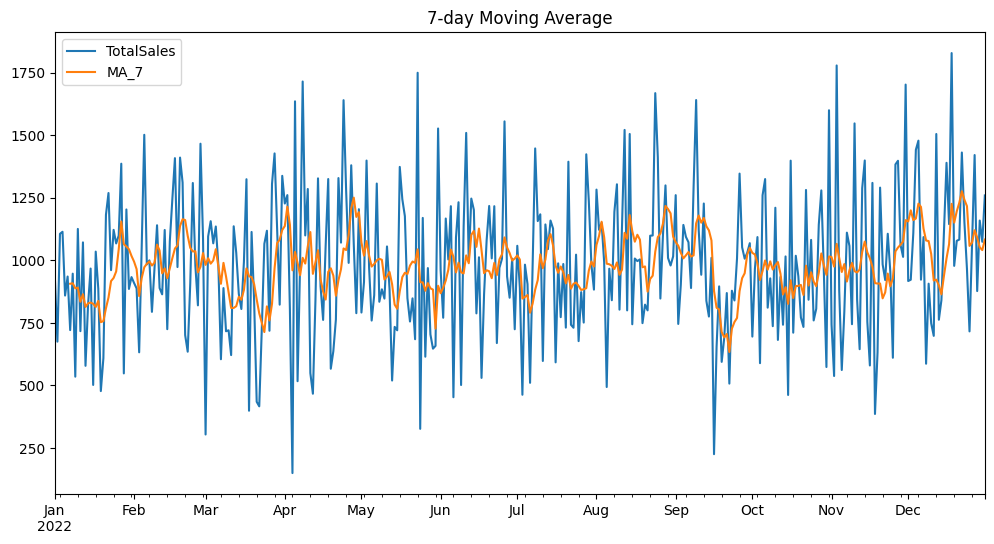

In [18]:
# Moving Average
data['MA_7'] = data['TotalSales'].rolling(window=7).mean()
data[['TotalSales', 'MA_7']].plot(title='7-day Moving Average', figsize=(12, 6))
data

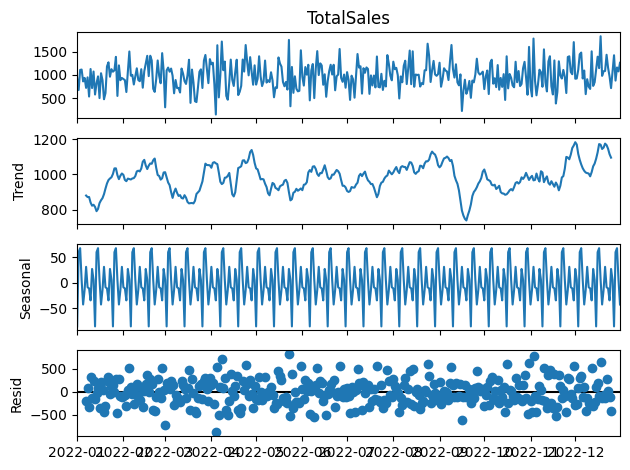

In [19]:
# Seasonal Decomposition
result = seasonal_decompose(data['TotalSales'], model='additive', period=12)
result.plot()
plt.show()

Augmented Dickey-Fuller (ADF) test. The purpose of this test is to determine whether the time series is stationary or not.

ADF Statistic: The more negative this statistic, the stronger the rejection of the hypothesis that there is a unit root. In other words, a highly negative value suggests stationarity.  
p-value: A p-value below a threshold (commonly 0.05) suggests that the null hypothesis (that the time series has a unit root and is non-stationary) can be rejected.

In [20]:
# Statistical Test for Stationarity
result_adf = adfuller(data['TotalSales'])
print('ADF Statistic: %f' % result_adf[0])
print('p-value: %f' % result_adf[1])

ADF Statistic: -10.098227
p-value: 0.000000


Seasonal ARIMA (SARIMA): for time series data with both trend and seasonality

C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


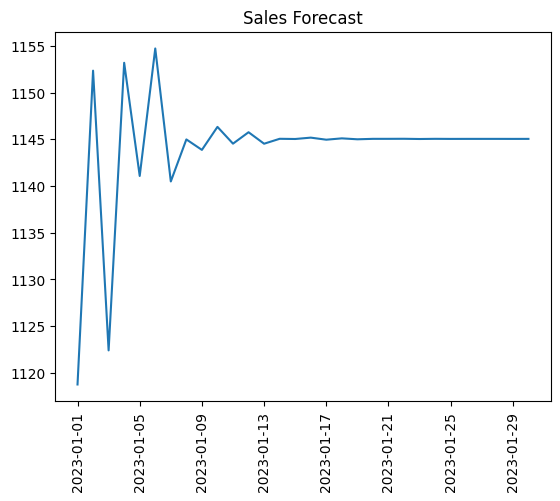

In [21]:
model = SARIMAX(data['TotalSales'], order=(5,1,0), seasonal_order=(0,0,0,0))
model_fit = model.fit(disp=False)
forecast = model_fit.forecast(steps=30)

# Plot Forecast
plt.plot(forecast)
plt.title('Sales Forecast')
plt.xticks(rotation=90)
plt.show()

Autoregressive Integrated Moving Average (ARIMA) Forecasting

In [23]:
ts = pd.Series(data['TotalSales'])
ts

2022-01-01     934.137692
2022-01-02     674.789014
2022-01-03    1105.534033
2022-01-04    1113.770660
2022-01-05     858.990135
                 ...     
2022-12-27    1420.403449
2022-12-28     876.885462
2022-12-29    1158.683086
2022-12-30    1073.844337
2022-12-31    1259.055898
Name: TotalSales, Length: 365, dtype: float64

C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


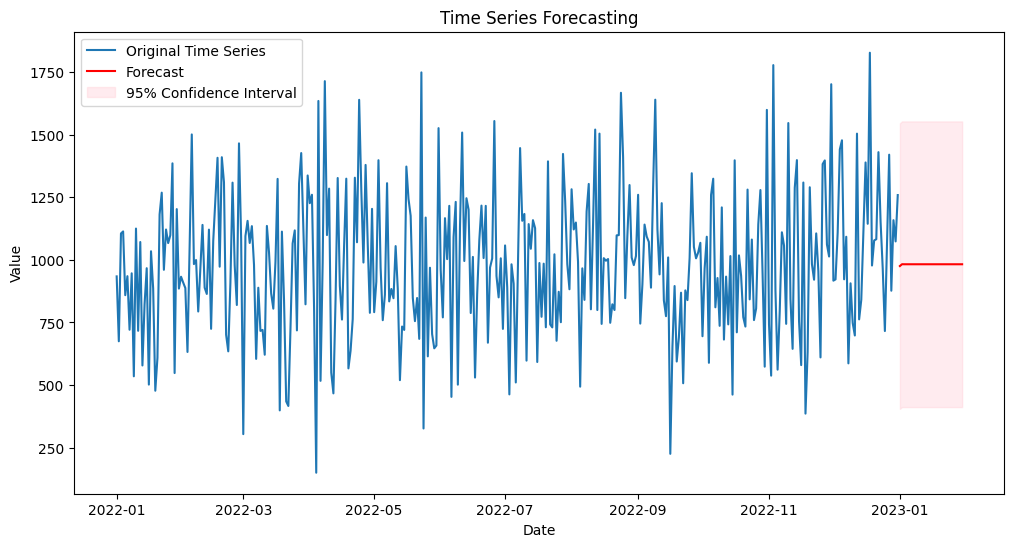

In [24]:
# Fit an ARIMA model
# The autoregressive (AR) component of order1 , 
# The differencing (I) component of order 1, the time series data is differenced once to make it stationary, 
# The moving average (MA) component of order 1.
model = sm.tsa.ARIMA(ts, order=(1, 1, 1))  
results = model.fit()

# Forecast future values
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the original time series and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Time Series')
plt.plot(pd.date_range(start=ts.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

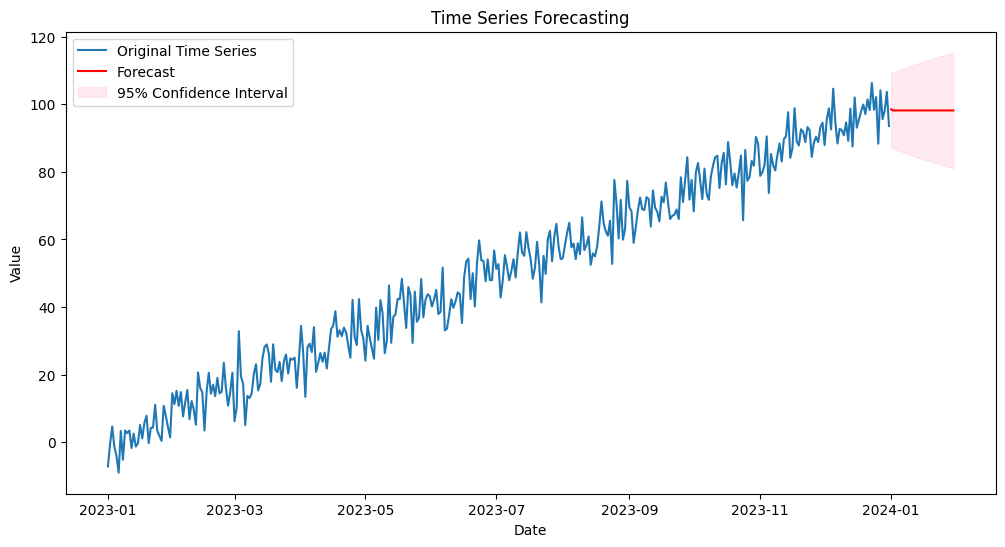

In [25]:
# Generate a sample time series dataset
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
linear_trend = np.linspace(0, 100, len(date_rng))  # Linear trend from 0 to 100
time_series_data = linear_trend + np.random.randn(len(date_rng)) * 5  # Add some random noise
ts = pd.Series(time_series_data, index=date_rng)

# Fit an ARIMA model
model = sm.tsa.ARIMA(ts, order=(1, 1, 1))
results = model.fit()

# Forecast future values
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the original time series and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Time Series')
plt.plot(pd.date_range(start=ts.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

        Date  Temperature
0 2019-01-01    50.310931
1 2019-01-02    52.473263
2 2019-01-03    52.187855
3 2019-01-04    49.658748
4 2019-01-05    49.947785


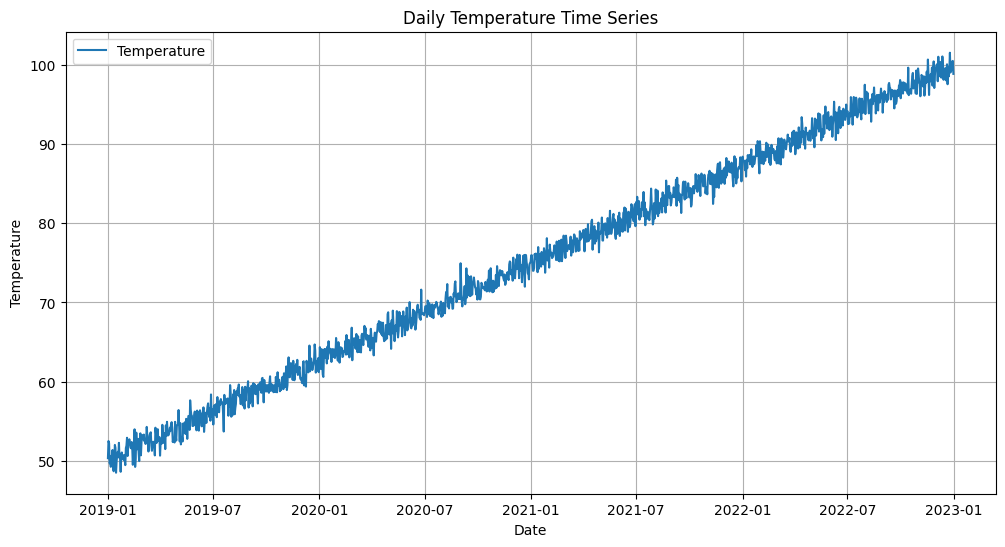

Mean Temperature: 74.98213897888566
Max Temperature: 101.5789924531609
Min Temperature: 48.46870194586218
Standard Deviation: 14.458632662289753


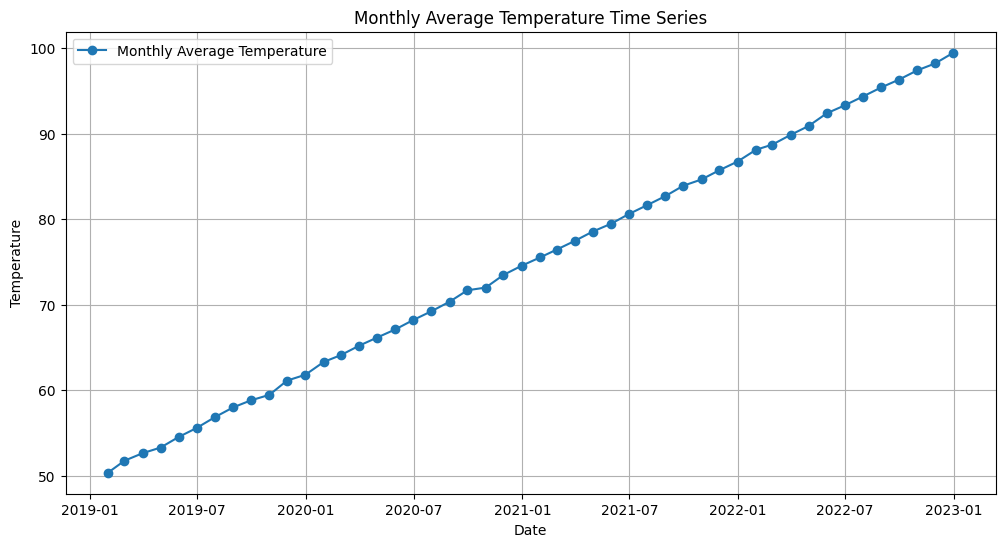

In [26]:
import pandas as pd
import numpy as np
import datetime

# Generate date range
start_date = datetime.date(2019, 1, 1)
end_date = datetime.date(2022, 12, 31)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Generate temperature data with a linear increasing trend
temperature_data = np.linspace(50, 100, num=len(date_range)) + np.random.randn(len(date_range))

# Create the DataFrame
data = pd.DataFrame({'Date': date_range, 'Temperature': temperature_data})

# Display the DataFrame
print(data.head())

# Convert the date column to a datetime objectd
data['Date'] = pd.to_datetime(data['Date'])

# Set the Date column as the index
data.set_index('Date', inplace=True)

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Temperature'], label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Daily Temperature Time Series')
plt.legend()
plt.grid(True)
plt.show()

# Calculate some basic statistics
mean_temperature = data['Temperature'].mean()
max_temperature = data['Temperature'].max()
min_temperature = data['Temperature'].min()
std_deviation = data['Temperature'].std()

print(f"Mean Temperature: {mean_temperature}")
print(f"Max Temperature: {max_temperature}")
print(f"Min Temperature: {min_temperature}")
print(f"Standard Deviation: {std_deviation}")

# Resample the data to monthly average
monthly_data = data['Temperature'].resample('M').mean()

# Plot the monthly average
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data, label='Monthly Average Temperature', marker='o')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Monthly Average Temperature Time Series')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Figure size 1200x600 with 0 Axes>

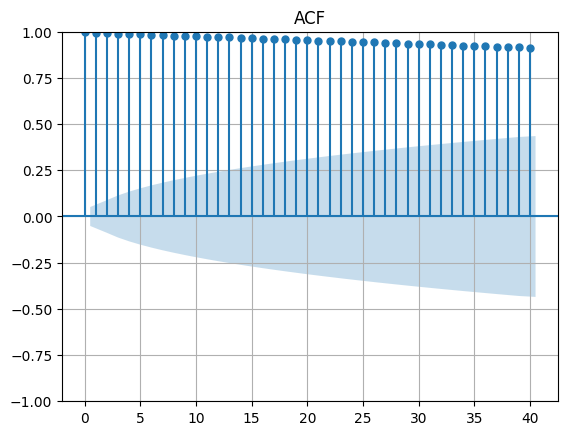

<Figure size 1200x600 with 0 Axes>

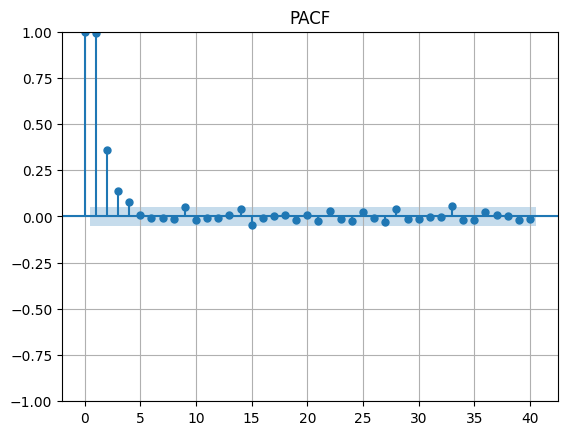

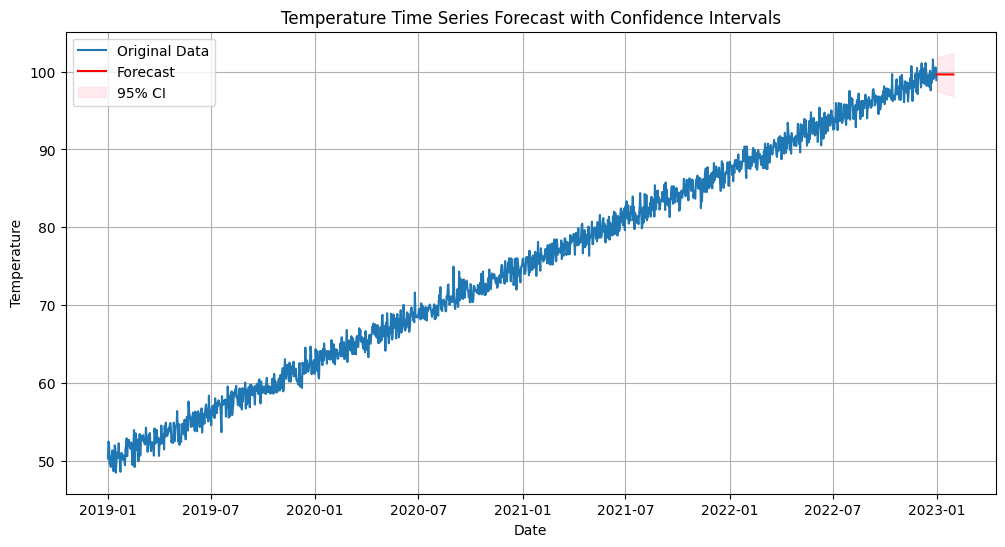

            Temperature   Lower CI    Upper CI
2023-01-01    99.639475  97.498504  101.780447
2023-01-02    99.674607  97.516622  101.832593
2023-01-03    99.642757  97.468648  101.816866
2023-01-04    99.642706  97.441947  101.843466
2023-01-05    99.644018  97.417403  101.870633
2023-01-06    99.643963  97.392244  101.895681
2023-01-07    99.643911  97.367326  101.920496
2023-01-08    99.643916  97.342717  101.945114
2023-01-09    99.643918  97.318368  101.969467
2023-01-10    99.643917  97.294270  101.993565
2023-01-11    99.643917  97.270416  102.017418
2023-01-12    99.643917  97.246800  102.041034
2023-01-13    99.643917  97.223414  102.064420
2023-01-14    99.643917  97.200253  102.087582
2023-01-15    99.643917  97.177308  102.110526
2023-01-16    99.643917  97.154575  102.133259
2023-01-17    99.643917  97.132048  102.155787
2023-01-18    99.643917  97.109721  102.178114
2023-01-19    99.643917  97.087589  102.200246
2023-01-20    99.643917  97.065647  102.222188
2023-01-21   

In [27]:
# Check the autocorrelation and partial autocorrelation plots to determine appropriate orders (p, d, q) for an ARIMA model
plt.figure(figsize=(12, 6))
plot_acf(data['Temperature'], lags=40, title='ACF')
plt.grid(True)

plt.figure(figsize=(12, 6))
plot_pacf(data['Temperature'], lags=40, title='PACF')
plt.grid(True)

# Fit an ARIMA model
order = (2, 1, 1)  # Example ARIMA order (p, d, q)
model = sm.tsa.ARIMA(data['Temperature'], order=order)
model_fit = model.fit()

# Make predictions with confidence intervals
forecast_steps = 30  # Number of future steps to predict
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create a DataFrame for the forecast
forecast_dates = pd.date_range(start=end_date + datetime.timedelta(days=1), periods=forecast_steps, freq='D')
forecast_data = pd.DataFrame({'Temperature': forecast_mean, 'Lower CI': forecast_ci.iloc[:, 0], 'Upper CI': forecast_ci.iloc[:, 1]}, index=forecast_dates)

# Plot the original data and the forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Temperature'], label='Original Data')
plt.plot(forecast_data.index, forecast_data['Temperature'], label='Forecast', color='red')
plt.fill_between(forecast_data.index, forecast_data['Lower CI'], forecast_data['Upper CI'], color='pink', alpha=0.3, label='95% CI')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Time Series Forecast with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()

# Display the forecast DataFrame
print(forecast_data)

Anomaly Detection:

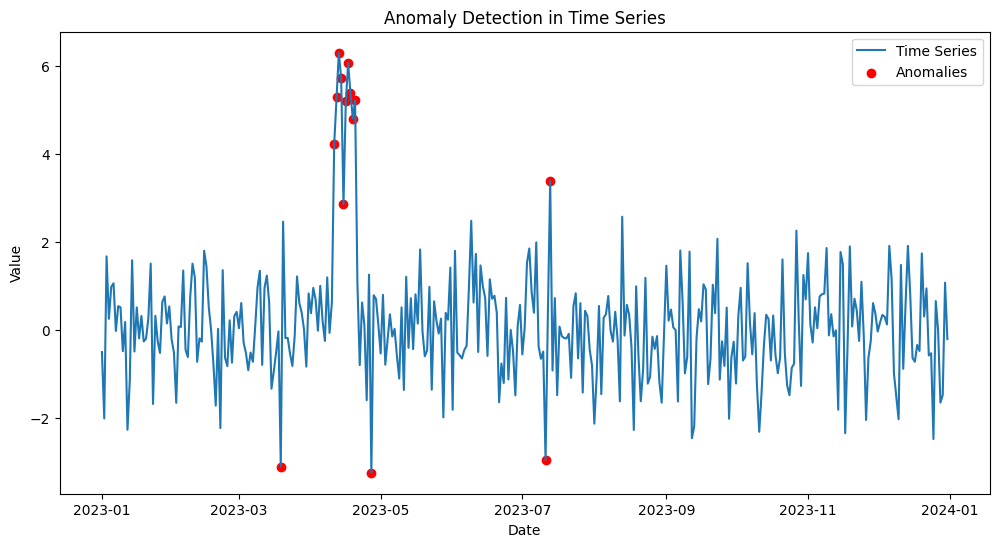

In [28]:
# Generate a sample time series dataset with an anomaly
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
time_series_data = np.random.randn(len(date_rng))
time_series_data[100:110] += 5  # Introduce an anomaly
ts = pd.Series(time_series_data, index=date_rng)

# Calculate z-scores for the data
z_scores = zscore(ts)

# Set a threshold for anomaly detection
threshold = 2.0

# Detect anomalies
anomalies = ts[abs(z_scores) > threshold]

# Plot the time series with detected anomalies
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Time Series')
plt.scatter(anomalies.index, anomalies.values, color='red', marker='o', label='Anomalies')
plt.title('Anomaly Detection in Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()